In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'

plt.style.use("seaborn-v0_8-dark")   

In [2]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [3]:
df.Name.unique()

array(['INCY', 'GILD', 'DXC', 'AFL', 'XYL', 'ARE', 'AMD', 'WYNN', 'IBM',
       'ATVI', 'AES', 'GPC', 'PRU', 'HST', 'WMB', 'GOOG', 'SRE', 'HSIC',
       'UNP', 'UPS', 'K', 'LYB', 'MDT', 'COF', 'HAS', 'CSX', 'GT', 'SYF',
       'EBAY', 'KSS', 'AJG', 'JWN', 'SBUX', 'IT', 'PH', 'DVN', 'MMM',
       'SPG', 'AKAM', 'IP', 'CPB', 'KMI', 'AAPL', 'NEM', 'KMX', 'TSCO',
       'SYY', 'VNO', 'NWS', 'NBL', 'ACN', 'APH', 'PDCO', 'WLTW', 'FIS',
       'URI', 'CBOE', 'FISV', 'BA', 'UAA', 'CVS', 'WU', 'SLB', 'AIV',
       'VLO', 'MU', 'CAH', 'AZO', 'CCI', 'ZTS', 'MCO', 'ALLE', 'RHI',
       'UAL', 'IR', 'CB', 'VMC', 'GD', 'AAP', 'NEE', 'ABT', 'WFC', 'DIS',
       'SNA', 'MAR', 'JPM', 'CLX', 'KIM', 'SCG', 'HBI', 'ABBV', 'RSG',
       'ETR', 'ADBE', 'COO', 'HLT', 'INTU', 'SLG', 'GWW', 'COG', 'CBS',
       'FB', 'CMS', 'MDLZ'], dtype=object)

In [4]:
amd_close = df[df.Name == 'AMD'][['Close']]

amd_close.head()

,Close
Date,
2010-01-04,9.70
2010-01-05,9.71
2010-01-06,9.57
2010-01-07,9.47
2010-01-08,9.43


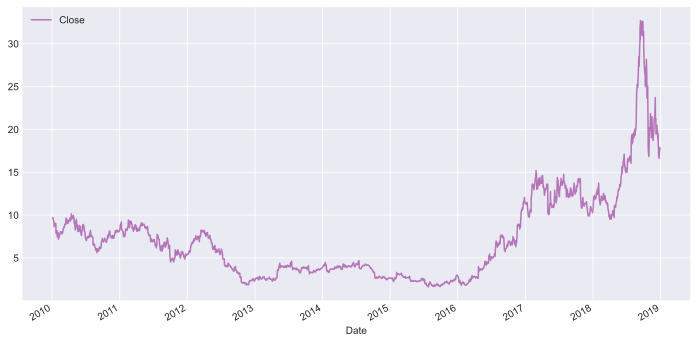

In [5]:
fig, axes = plt.subplots(figsize = (12,6))

amd_close.plot(ax = axes, color = 'purple', alpha = 0.5)

axes.grid()

In [6]:
# Lets define two different SMA's one fast (less lagged) and one slow 
fast_window = 14
slow_window = 60

amd_close['SMA-fast'] = amd_close['Close'].rolling(fast_window).mean()
amd_close['SMA-slow'] = amd_close['Close'].rolling(slow_window).mean()


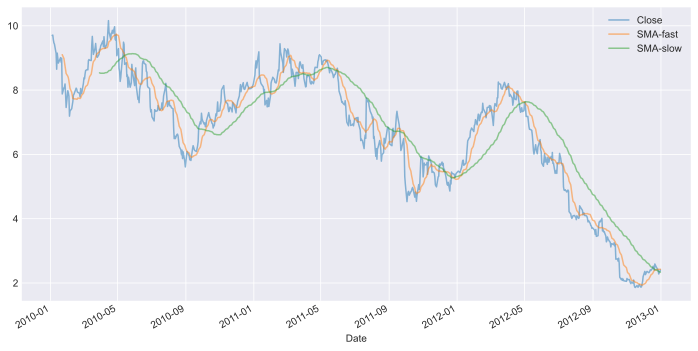

In [7]:
fig, axes = plt.subplots(figsize = (12,6))

amd_close.loc[amd_close.index < '2013-01-01'].plot(ax = axes, alpha = 0.5)

axes.grid()

In algorithmic trading, these relation between these two SMA's is used to make short/long (sell/buy) signals. In particular,

- Whenever the fast SMA crosses the slow from above, it is a short (sell) signal. 
- Whenever the fast SMA crosses the slow from below, we take a long position (buy). 

Notice from the plot above that this strategy works well, however one needs to optimize the window sizes for the strategy to work optimal. 